In [120]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


Open Dataset in Pandas Dataframe

In [46]:
df = pd.read_csv("heart_disease.csv")
target = df.pop('HeartDiseaseorAttack')


In [47]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [48]:
# Convert the data into a format that can be used by TensorFlow
X_train = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [49]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [50]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6342/6342 [==============================] - 20s 3ms/step - loss: 0.2520 - accuracy: 0.9063
Epoch 2/10
6342/6342 [==============================] - 11s 2ms/step - loss: 0.2443 - accuracy: 0.9074
Epoch 3/10
6342/6342 [==============================] - 11s 2ms/step - loss: 0.2417 - accuracy: 0.9076
Epoch 4/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2404 - accuracy: 0.9076
Epoch 5/10
6342/6342 [==============================] - 10s 2ms/step - loss: 0.2397 - accuracy: 0.9079
Epoch 6/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2390 - accuracy: 0.9080
Epoch 7/10
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2385 - accuracy: 0.9080
Epoch 8/10
6342/6342 [==============================] - 15s 2ms/step - loss: 0.2383 - accuracy: 0.9080
Epoch 9/10
6342/6342 [==============================] - 16s 2ms/step - loss: 0.2381 - accuracy: 0.9080
Epoch 10/10
6342/6342 [==============================] - 16s 2ms/step - l

In [52]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

1586/1586 [==============================] - 3s 2ms/step - loss: 0.2415 - accuracy: 0.9069


In [104]:
predictions = model.predict(X_test)
# Convert the predictions to a binary class
predictions = (predictions > 0.5).astype(int)
predictions = [pred[0] for pred in predictions]
predictions = np.array(predictions)

1586/1586 [==============================] - 5s 3ms/step


In [107]:
y_true = y_test.numpy().astype(int)
test_acc = sum(predictions == y_true) / len(y_true)
Hc = sum(y_true == 0)
Sick = sum(y_true == 1)
PredHc = sum(predictions == 0)
PredSick = sum(predictions == 1)
print("Subjects:", len(y_true))
print("Actual Healthy Subjects:", Hc)
print("Actual Sick Subjects:", Sick)
print("Predicted Healthy Subjects:", Hc)
print("Predicted Sick Subjects:", Sick)
print("Test Set Accuracy:", test_acc)

Subjects: 50736
Actual Healthy Subjects: 45937
Actual Sick Subjects: 4799
Predicted Healthy Subjects: 45937
Predicted Sick Subjects: 4799
Test Set Accuracy: 0.9069497004099654


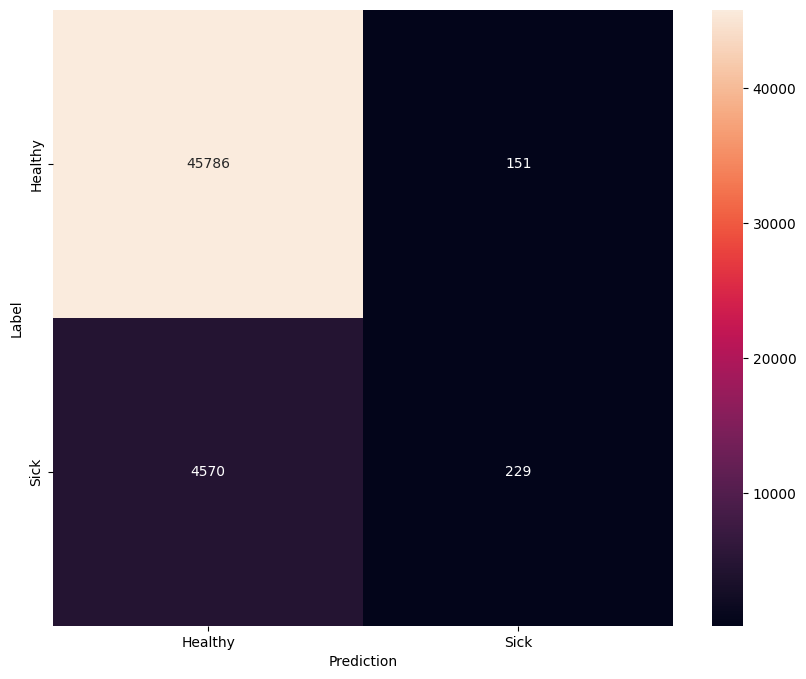

In [106]:
confusion_mtx = tf.math.confusion_matrix(y_test, predictions)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

Decission Tree Classificator

In [115]:
# Create the model
model = DecisionTreeClassifier()

In [116]:
# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [121]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.85
F1 score: 0.25


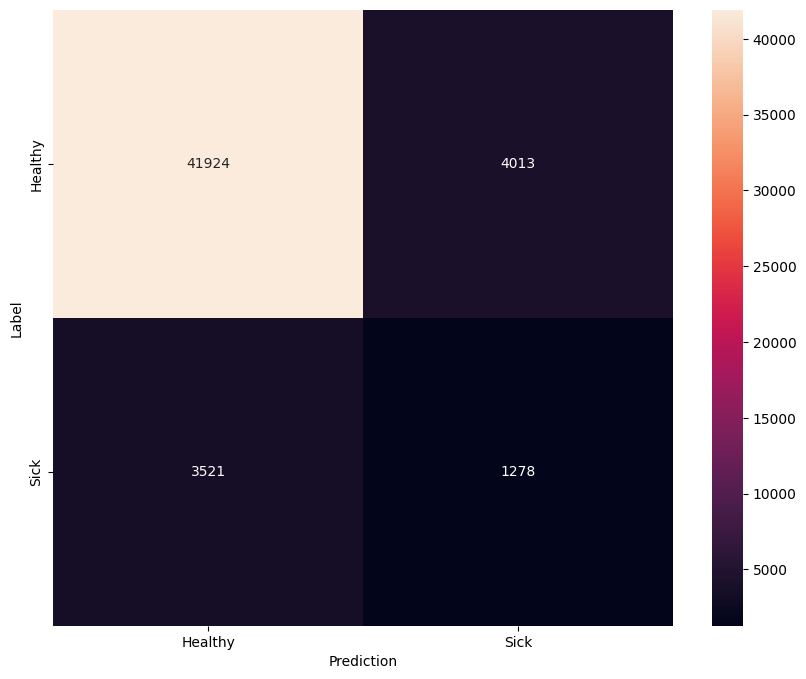

In [123]:
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [125]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=tf.unique(y_train)[0].shape[0], activation='softmax'),
    #tf.keras.layers.Dense(1, activation='sigmoid')
])

In [126]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [127]:
history = model.fit(X_train, epochs=10, batch_size=32)

NameError: name 'train_dataset' is not defined